In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score 
from IPython.display import Image 
import seaborn as sns
from IPython.display import Image 
from sklearn import tree




In [16]:
df=pd.read_csv("C:\\Users\\ritik\\Downloads\\winequality_red.csv")

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df.shape

(1599, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
df.isnull().sum().sum()

0

In [22]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [23]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [24]:
## it's miss leading and it is highly imbalance then we use the smote to balance the data

In [26]:
#pip install imblearn

In [28]:
x=df.drop(columns=["quality"])
y=df["quality"]

In [29]:
from imblearn.over_sampling import SMOTE

In [31]:
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x,y)

In [32]:
from collections import Counter
Counter(y_smote)

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

In [33]:
x_smote

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
4081,7.354302,0.364570,0.302285,1.845698,0.069887,16.543020,25.142450,0.994311,3.237715,0.713709,11.377151
4082,8.810578,0.389337,0.474104,1.784767,0.069477,6.390690,15.543017,0.994830,3.213047,0.752454,12.119181
4083,10.139581,0.368681,0.492639,2.386507,0.069466,5.266866,14.932535,0.996656,3.203373,0.660675,11.186806
4084,5.283126,0.622907,0.150344,1.716874,0.052922,15.696867,67.931291,0.992030,3.644500,0.777750,13.480936


In [34]:
print(x_smote.shape)
print(y_smote.shape)

(4086, 11)
(4086,)


In [35]:
## Now Dividing this smote data(over sampled data) inti training and test data

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,random_state=42)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3064, 11)
(1022, 11)
(3064,)
(1022,)


In [39]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

## Predictions

In [40]:
y_pred=clf.predict(x_test)

## Accuracy

In [41]:
y_train_pred=clf.predict(x_train)

In [44]:
acc=accuracy_score(y_train,y_train_pred)
acc

1.0

- It is overfitting situation due to depth of the tree

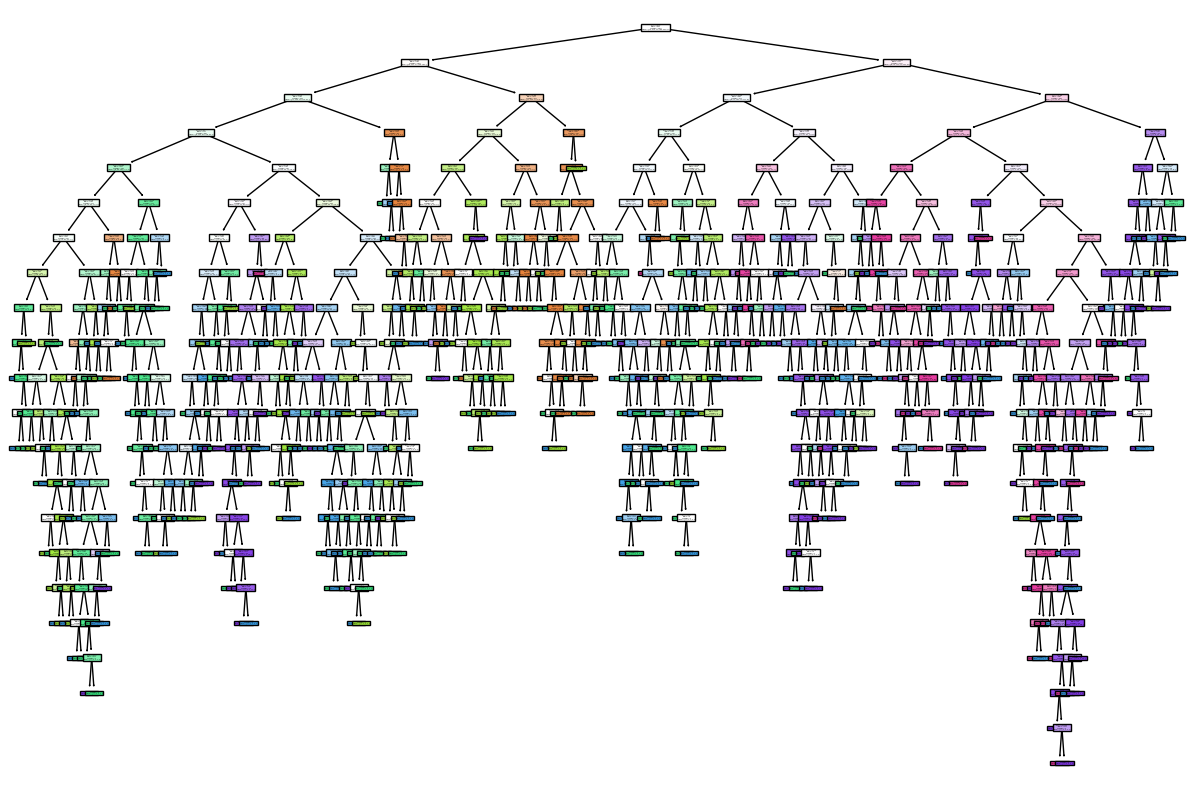

In [49]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

In [47]:
 grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}


In [50]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1) 


In [52]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [53]:
grid_search.best_score_

0.7780699229120687

In [54]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 26, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [55]:
treemodel=DecisionTreeClassifier(criterion='gini',max_depth=26,min_samples_leaf=1,min_samples_split=2,splitter='best')

In [56]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=26)

In [57]:
y_pred=treemodel.predict(x_test)

In [58]:
accuracy_score(y_test,y_pred)

0.7710371819960861